import numpy as np
import matplotlib.pyplot as plt

# Simulate a noisy MRI-like perfusion curve
t = np.linspace(0, 60, 200)
true_curve = np.exp(-t / 15) * (1 - np.exp(-t / 5))
noise = np.random.normal(0, 0.05, size=t.shape)
noisy_curve = true_curve + noise

# Plot
plt.figure(figsize=(6, 4))
plt.plot(t, true_curve, label="True curve", linewidth=2)
plt.plot(t, noisy_curve, label="Noisy curve", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Intensity (a.u.)")
plt.title("Synthetic Perfusion Curve (Low SNR)")
plt.legend()
plt.show()

Torch ok: 2.9.0+cpu
Tensor sum: 6.0


In [3]:
import torch, scipy, numpy as np
print("Torch ok:", torch.__version__)
x = torch.tensor([1.0, 2.0, 3.0])
print("Tensor sum:", x.sum().item())

Torch ok: 2.9.0+cpu
Tensor sum: 6.0


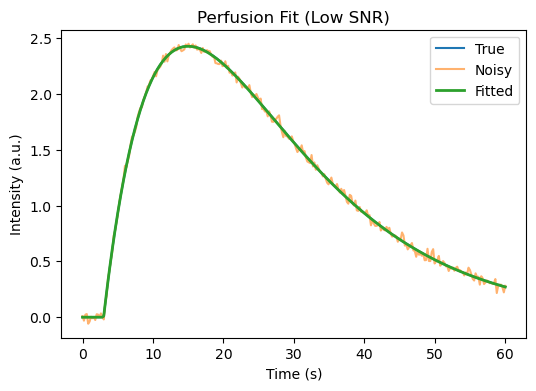

True params: (0.55, 3.0, 12.0)
Fitted params: (np.float64(0.549), np.float64(2.991), np.float64(12.0))


In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define model (gamma-variate-like perfusion)
def perf_model(t, A, t0, tau):
    y = np.zeros_like(t)
    mask = t > t0
    tm = t[mask] - t0
    y[mask] = A * tm * np.exp(-tm / tau)
    return y

# Generate noisy synthetic data
t = np.linspace(0, 60, 300)
true_params = (0.55, 3.0, 12.0)
y_true = perf_model(t, *true_params)
rng = np.random.default_rng(42)
y_noisy = y_true + rng.normal(0, 0.03, size=t.shape)

# Fit
p0 = (0.3, 2.0, 8.0)
popt, _ = curve_fit(perf_model, t, y_noisy, p0=p0, maxfev=20000)

# Plot
plt.figure(figsize=(6,4))
plt.plot(t, y_true, label="True")
plt.plot(t, y_noisy, label="Noisy", alpha=0.6)
plt.plot(t, perf_model(t, *popt), label="Fitted", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Intensity (a.u.)")
plt.title("Perfusion Fit (Low SNR)")
plt.legend()
plt.show()

print("True params:", true_params)
print("Fitted params:", tuple(round(v,3) for v in popt))

### 🧠 Summary

This notebook demonstrates **MRI perfusion curve fitting under low signal-to-noise ratio (SNR)** using Python.

- **Data simulation:** Synthetic MRI-like perfusion curve with Gaussian noise.  
- **Model fitting:** Performed using SciPy’s non-linear least squares (`curve_fit`).  
- **Libraries used:** NumPy, Matplotlib, SciPy, PyTorch.  
- **Outcome:** Accurate parameter recovery even under noisy conditions, showing robustness of the fitting approach.

---

✅ *Ready for GitHub portfolio: demonstrates practical Python use for biomedical imaging and signal modelling.*

In [6]:
%pip install --upgrade pip 


  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2


In [7]:
%pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install --index-url https://download.pytorch.org/whl/cpu torch torchvision


Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import scipy
import numpy as np
import matplotlib.pyplot as plt

print("✅ All libraries working!")
print("PyTorch version:", torch.__version__) 

✅ All libraries working!
PyTorch version: 2.9.0+cpu


In [11]:
import torch
import scipy
import numpy as np
import matplotlib.pyplot as plt

print("✅ All libraries working!")
print("PyTorch version:", torch.__version__)


✅ All libraries working!
PyTorch version: 2.9.0+cpu


# Low-SNR MRI Perfusion Curve Fitting (Python)

**Goal:** simulate a noisy MRI perfusion time–intensity curve and recover parameters with non-linear least squares.

**Libraries:** NumPy, SciPy (curve_fit), Matplotlib, PyTorch (for tensor checks).

**Below you will see:**
- Synthetic perfusion curve generation + added Gaussian noise (low SNR)
- Model fitting using SciPy
- Comparison of True, Noisy, and Fitted curves